In [26]:
import collections
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats

In [3]:
df_business = pd.read_csv("new_business.csv")
df_review = pd.read_csv("new_review.csv")

In [4]:
df_business_new = df_business[['business_id','city']]
df_review_new = df_review[['business_id','review_id', 'user_id']]
df_review_business = df_review_new.merge(df_business_new,on=["business_id"])
df_review_business

,business_id,review_id,user_id,city
0,5UmKMjUEUNdYWqANhGckJw,Ya85v4eqdd6k9Od8HbQjyA,PUFPaY9KxDAcGqfsorJp3Q,Dravosburg
1,5UmKMjUEUNdYWqANhGckJw,KPvLNJ21_4wbYNctrOwWdQ,Iu6AxdBYGR4A0wspR9BYHA,Dravosburg
2,5UmKMjUEUNdYWqANhGckJw,fFSoGV46Yxuwbr3fHNuZig,auESFwWvW42h6alXgFxAXQ,Dravosburg
3,5UmKMjUEUNdYWqANhGckJw,pVMIt0a_QsKtuDfWVfSk2A,qiczib2fO_1VBG8IoCGvVg,Dravosburg
4,5UmKMjUEUNdYWqANhGckJw,AEyiQ_Y44isJmNbMTyoMKQ,qEE5EvV-f-s7yHC0Z4ydJQ,Dravosburg
5,5UmKMjUEUNdYWqANhGckJw,V-bqYx62zpxfH2oFkzXPzw,jBoH6qKGO7wdYyg_YjBcQA,Dravosburg
6,5UmKMjUEUNdYWqANhGckJw,3saY_LVFUpkAfd9t86VNdw,bWrodc7hN_T4q2r-rolrOA,Dravosburg
7,UsFtqoBl7naz8AVUBZMjQQ,Di3exaUCFNw1V4kSNW5pgA,uK8tzraOp4M5u3uYrqIBXg,Dravosburg
8,UsFtqoBl7naz8AVUBZMjQQ,0Lua2-PbqEQMjD9r89-asw,I_47G-R2_egp7ME5u_ltew,Dravosburg
9,UsFtqoBl7naz8AVUBZMjQQ,7N9j5YbBHBW6qguE5DAeyA,PP_xoMSYlGr2pb67BbqBdA,Dravosburg


In [5]:
df_review_business = df_review_business[df_review_business.city == 'Las Vegas']

In [10]:
df_review_business.user_id.value_counts()

9A2-wSoBUxlMd3LwmlGrrQ    1458
Iu3Jo9ROp2IWC9FwtWOaUQ    1398
glRXVWWD6x1EZKfjJawTOg    1073
ia1nTRAQEaFWv0cwADeK7g    1036
PV5voYSD43Cn_3gHmxG7DA     784
5lq4LkrviYgQ4LJNsBYHcA     711
kGgAARL2UmvCcTRfiscjug     687
XjfKBr96h6GgrfkR_q6gIA     660
k5p3YP1ZjCa8ZS3xqXgBug     626
OAd-vbR_POac1zHtu-Y2Zg     610
WmAyExqSWoiYZ5XEqpk_Uw     601
y05bv65OCTcZgB0GhO8_sA     571
38JK-SfO9NkAGs1RwlH2Gw     540
OaFcpi3W4AwxrD8W2pgC_A     539
EjhVxYFeMUYimoImjMduzQ     536
Mx-vxv_V-SQCe76w4RmUfA     471
rzHZ3iYVQe_8h2e42DbUsw     470
ifFTbGgwjXALO1PgMHzrTQ     459
17LPTsu4RgqTZ3SxsGzzxw     450
zTWH9b_ItSdLOK9ypeFOIw     436
8l351svY2y1yX5LFm8H3vQ     435
NjOYSgr2LNMoSPi4e140Ig     433
KkEFlQAmrKf6BtPVi6EU7g     424
i8KMQX7nekLSCzb_DVb6yA     418
XHkzCzmIAB3DnjQO7v6jww     407
XpxK7cAT4R3wQjHOZccasw     403
qqtmFGhyyHc37coT4qJxaw     389
WZwfmfP5X1gDDeL-M9vzZA     382
2HmHgW3hRYvXYFmQyQtLuw     376
FcUVfATxARfURHfZq1DNTg     373
                          ... 
xDMCnoiRjYRw_hEhu43ksA       1
zVoBxGVq

In [14]:
df_La= df_review_business['user_id'].value_counts()

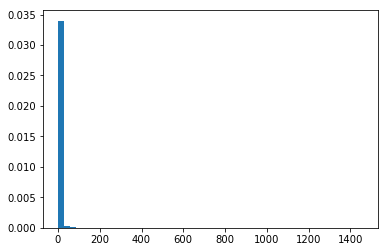

In [22]:
num_bins=50
n, bins, patches = plt.hist(df_La, num_bins, normed=1)
plt.show()

In [27]:
data = np.log(df_La)
# data = np.log(data)
# plt.hist([data],50,normed=1);
n, bins, patches = plt.hist(data, num_bins, normed=1) 


param=stats.expon.fit(data)
pdf_fitted = stats.expon.pdf(bins,loc=param[0],scale=param[1])
plt.plot(bins,pdf_fitted , 'ro--')


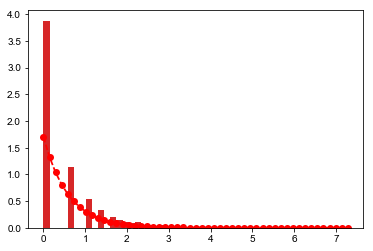

In [28]:
plt.show()

C:\Users\AL\lib\site-packages\scipy\stats\_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


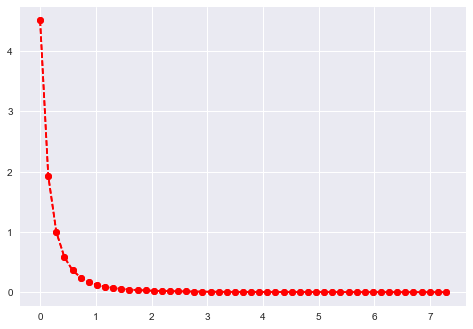

In [30]:
param=stats.pareto.fit(data)
pdf_fitted = stats.pareto.pdf(bins,b=param[0],loc=param[1],scale=param[2])
plt.plot(bins,pdf_fitted , 'ro--')
plt.show()

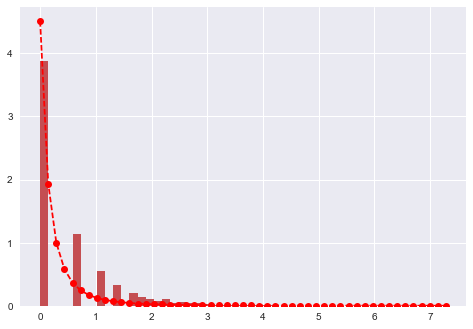

In [33]:
n, bins, patches = plt.hist(data, num_bins, normed=1)
pdf_fitted = stats.pareto.pdf(bins,b=param[0],loc=param[1],scale=param[2])
plt.plot(bins,pdf_fitted , 'ro--')
plt.show()